# Rozdział 5. Rozwiązywanie równań

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()

import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl
#mpl.rcParams["font.family"] = "serif"
#mpl.rcParams["font.size"] = "12"

In [8]:
from __future__ import division

## Algebra Liniowa — Układy równań liniowych

$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

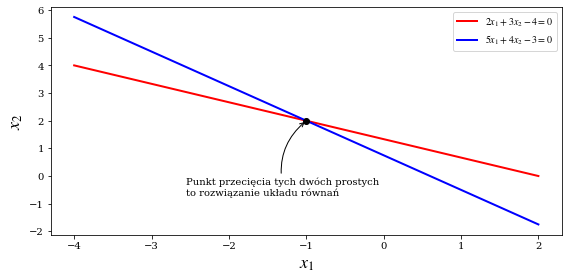

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")

A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("Punkt przecięcia tych dwóch prostych\nto rozwiązanie układu równań",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

fig.tight_layout()

### Podejście symboliczne

In [10]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [11]:
A.rank()

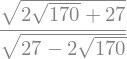

In [12]:
A.condition_number()

In [13]:
sympy.N(_)

In [14]:
A.norm()

In [15]:
L, U, P = A.LUdecomposition()

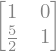

In [16]:
L

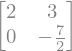

In [17]:
U

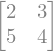

In [18]:
L * U

In [19]:
x = A.solve(b) # Odpowiednik wywołania A.LUsolve(b)

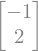

In [20]:
x

### Podejście numeryczne

In [21]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [22]:
np.linalg.matrix_rank(A)

2

In [23]:
np.linalg.cond(A)

In [24]:
np.linalg.norm(A)

In [25]:
P, L, U = la.lu(A)

In [26]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [27]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [28]:
np.dot(L, U)

array([[5., 4.],
       [2., 3.]])

In [29]:
np.dot(P, np.dot(L, U))

array([[2., 3.],
       [5., 4.]])

In [30]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [31]:
la.solve(A, b)

array([-1.,  2.])

### Przykład: Wpływ wartości p na błąd względny rozwiązania i wartość współczynnika uwarunkowania

In [32]:
p = sympy.symbols("p", positive=True)

In [33]:
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])

In [34]:
b = sympy.Matrix([1, 2])

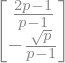

In [35]:
sympy.simplify(A.solve(b))

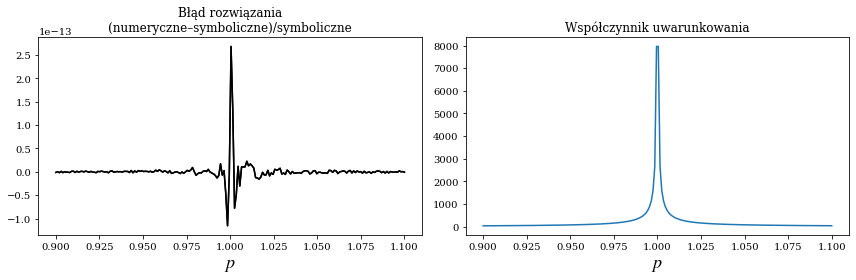

In [36]:
# Symboliczna specyfikacja problemu
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Rozwiązanie symboliczne
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()

# Funkcje do rozwiązania numerycznego
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Wykreślenie różnic pomiędzy symbolicznym (dokładnym) rozwiązaniem a rozwiązaniami numerycznymi
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Błąd rozwiązania\n(numeryczne–symboliczne)/symboliczne")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Współczynnik uwarunkowania")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()
fig.savefig('ch5-linear-systems-condition-number.pdf')

### Układy z macierzą prostokątną

### Układy niedookreślone

In [37]:
unknown = sympy.symbols("x, y, z")

In [38]:
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])

In [39]:
x = sympy.Matrix(unknown)

In [40]:
b = sympy.Matrix([7, 8])

In [41]:
AA = A * x - b

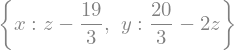

In [42]:
sympy.solve(A*x - b, unknown)

### Układy nadokreślone: metoda najmniejszych kwadratów

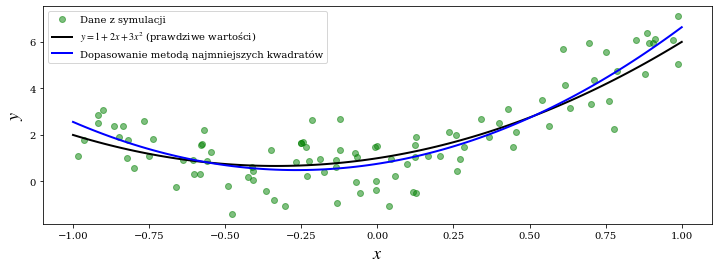

In [43]:
np.random.seed(1234)

# Rzeczywiste parametry modelu
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# Symulacja zaszumionych danych
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# Dopasowanie modelu do danych z użyciem metody najmniejszych kwadratów
A = np.vstack([X**0, X**1, X**2])  # Zamiast vstack można również wykorzystać np.vander
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Dane z symulacji')
ax.plot(x, y_exact, 'k', lw=2, label='$y = 1 + 2x + 3x^2$ (prawdziwe wartości)')
ax.plot(x, y_fit, 'b', lw=2, label='Dopasowanie metodą najmniejszych kwadratów')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square.pdf')

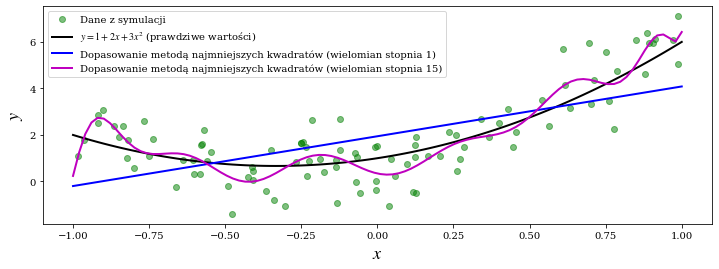

In [44]:
# Dopasowywanie modelu z wykorzystaniem metody najmniejszych kwadratów
# Wielomian stopnia 1
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# Wielomian stopnia 15
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Dane z symulacji')
ax.plot(x, y_exact, 'k', lw=2, label='$y = 1 + 2x + 3x^2$ (prawdziwe wartości)')
ax.plot(x, y_fit1, 'b', lw=2, label='Dopasowanie metodą najmniejszych kwadratów (wielomian stopnia 1)')
ax.plot(x, y_fit15, 'm', lw=2, label='Dopasowanie metodą najmniejszych kwadratów (wielomian stopnia 15)')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square-2.pdf')

## Problem wartości własnych

In [45]:
eps, delta = sympy.symbols("epsilon, delta")

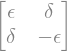

In [46]:
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

In [47]:
eval1, eval2 = H.eigenvals()

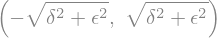

In [48]:
eval1, eval2

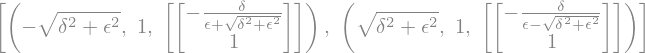

In [49]:
H.eigenvects()

In [50]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()

In [51]:
sympy.simplify(evec1[0].T * evec2[0])

In [52]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
A

array([[1, 3, 5],
       [3, 5, 3],
       [5, 3, 9]])

In [53]:
evals, evecs = la.eig(A)

In [54]:
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [55]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [56]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

## Równania nieliniowe

### Równania jednej zmiennej

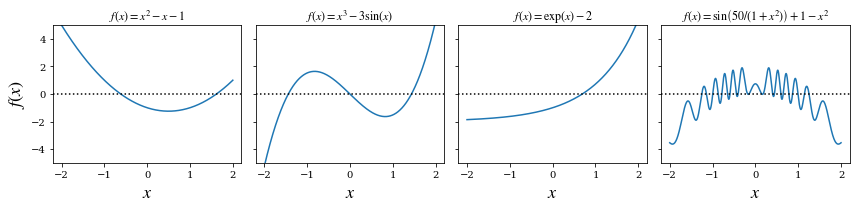

In [57]:
x = np.linspace(-2, 2, 1000)

# Cztery przykładowe funkcje nieliniowe
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# Wykreślanie każdej funkcji
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)
    
fig.tight_layout()
fig.savefig('ch5-nonlinear-plot-equations.pdf')

### Metody symboliczne

In [58]:
x, a, b, c = sympy.symbols("x, a, b, c")

In [59]:
e = a + b*x + c*x**2

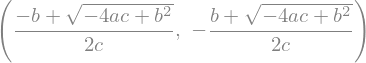

In [60]:
sol1, sol2 = sympy.solve(e, x)

sol1, sol2

In [61]:
e.subs(x, sol1).expand()

In [62]:
e.subs(x, sol2).expand()

In [63]:
e = a * sympy.cos(x) - b * sympy.sin(x)

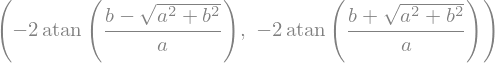

In [64]:
sol1, sol2 = sympy.solve(e, x)

sol1, sol2

In [65]:
e.subs(x, sympy.atan(a/b))

In [66]:
e.subs(x, sol1).simplify()

In [67]:
e.subs(x, sol2).simplify()

In [69]:
#sympy.solve(sympy.sin(x)-x, x)

### Metoda bisekcji

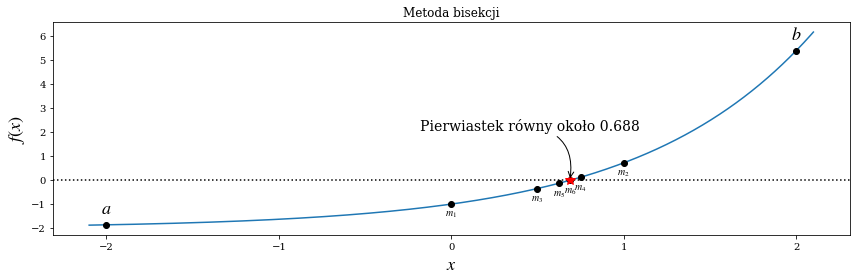

In [70]:
# Definicja funkcji, określenie dokładności i przedziału początkowego [a, b]
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# Wykres funkcji f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# Poszukiwanie pierwiastka metodą bisekcji wraz z 
# zaznaczaniem kolejnych kroków na wykresie
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Pierwiastek równy około %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Metoda bisekcji")

fig.tight_layout()

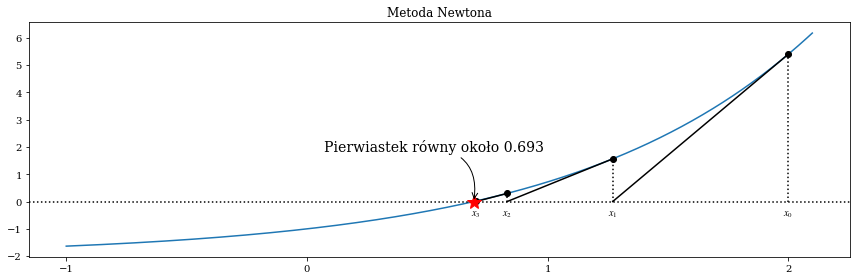

In [71]:
# Definicja funkcji, określenie dokładności i punktu startowego xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# Tworzenie wykresu do wizualizacji kolejnych kroków
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# Metoda Newtona jest powtarzana, aż do osiągnięcia zadanej dokładności
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Pierwiastek równy około %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Metoda Newtona")
ax.set_xticks([-1, 0, 1, 2])
fig.tight_layout()

### Poszukiwanie pierwiastków z wykorzystaniem `scipy.optimize`

In [72]:
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [73]:
optimize.newton(lambda x: np.exp(x) - 2, 2)

In [74]:
x_root_guess = 2

In [75]:
f = lambda x: np.exp(x) - 2

In [76]:
fprime = lambda x: np.exp(x)

In [77]:
optimize.newton(f, x_root_guess)

In [78]:
optimize.newton(f, x_root_guess, fprime=fprime)

In [79]:
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

In [80]:
optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)

In [81]:
optimize.ridder(lambda x: np.exp(x) - 2, -2, 2)

### Funkcje wielu zmiennych

In [82]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

In [83]:
optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [84]:
def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

In [85]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

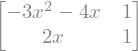

In [86]:
x, y = sympy.symbols("x, y")

f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x, y]))

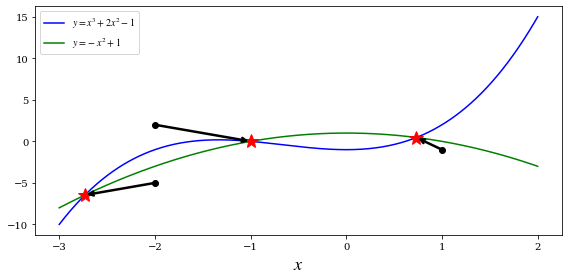

In [87]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)

    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()

In [88]:
optimize.broyden2(f, x_guesses[1])

array([0.73205079, 0.46410162])

/Users/filip/miniconda3/envs/py3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


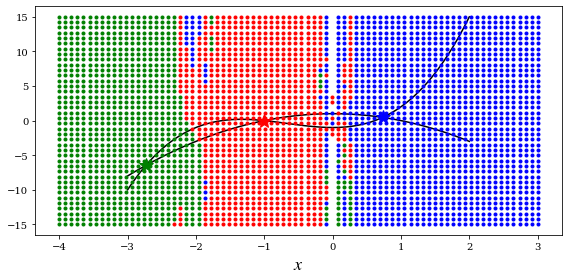

In [9]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1,
            x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = optimize.fsolve(f, [-2,  2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])
colors = ['r', 'b', 'g']
for idx, s in enumerate([sol1, sol2, sol3]):
    ax.plot(s[0], s[1], colors[idx]+'*', markersize=15)

colors = ['r', 'b', 'g']
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-8:
                # ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
    
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()